In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, KFold, cross_validate, train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from scipy.stats import kurtosis
from sklearn import random_projection
from scipy.linalg import pinv
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.manifold import TSNE

In [2]:
#load data
df = pd.read_csv (r'./data/wine.csv')

#preprocessing
# convert target to binary
df.loc[df.quality =='bad', "quality"] = 0 #bad wine
df.loc[df.quality == 'good', "quality"] = 1 #good wine
#get the target
y = df.pop('quality')
#scale features
X_scaled = preprocessing.scale(df)

#split train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

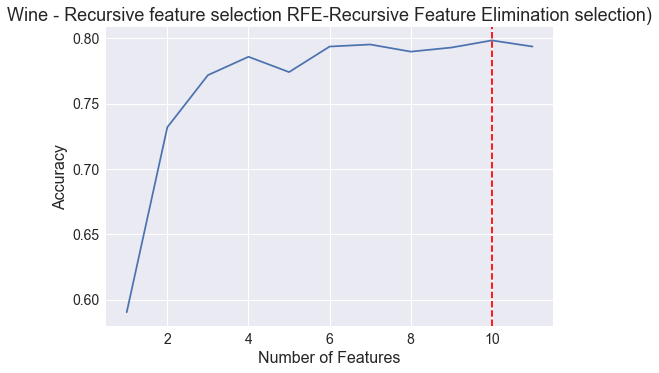

In [3]:
#recursive feature selection RFE
#dim reduction using labels
n_features = X_train.shape[1]
y_train=y_train.astype('int')
accuracy_list = []
kfold = StratifiedKFold(n_splits=3, random_state=42,shuffle = True)
for feature in range(1,n_features+1):
    selector = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=feature)
    selector = selector.fit(X_train, y_train)
    X_reduced = X_train[:,selector.support_]
    rf = RandomForestClassifier(random_state=42)
    mean_accuracy = np.mean(cross_val_score(rf, X_reduced, y_train, scoring='accuracy', cv=5, n_jobs=-1, error_score='raise'))
    accuracy_list.append(mean_accuracy)
plt.style.use('seaborn')
plt.plot(range(1,n_features+1),accuracy_list)
plt.xlabel('Number of Features', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)
#plt.legend(fontsize=16)
plt.title('Wine - Recursive feature selection RFE-Recursive Feature Elimination selection)', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
#plt.ylim(0.75,0.81)
plt.axvline(x=10,color='r', linestyle='--')
plt.show()

In [4]:
#use 10 components based on above tests
selector = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=10)
selector = selector.fit(X_train, y_train)
X_reduced = X_train[:,selector.support_]

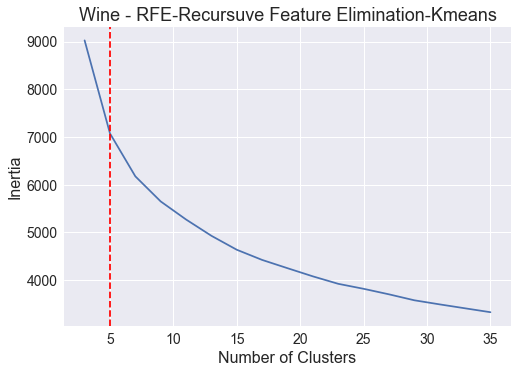

In [5]:
#find best kmeans on pca data using elbow method
cluster_range = [3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35]
#mean squared distance between each instance and its closest centroid. Also called inertia
msd = []
for num_cluster in cluster_range:
    c = KMeans(n_clusters=num_cluster, random_state=1)
    #apply kmeans on pca data
    c_labels = c.fit(X_reduced)
    msd.append(c.inertia_)
plt.style.use('seaborn')
plt.plot([3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35],msd)
plt.xlabel('Number of Clusters', fontsize = 16)
plt.ylabel('Inertia', fontsize = 16)
plt.title('Wine - RFE-Recursuve Feature Elimination-Kmeans', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.axvline(x=5,color='r', linestyle='--')
plt.show()

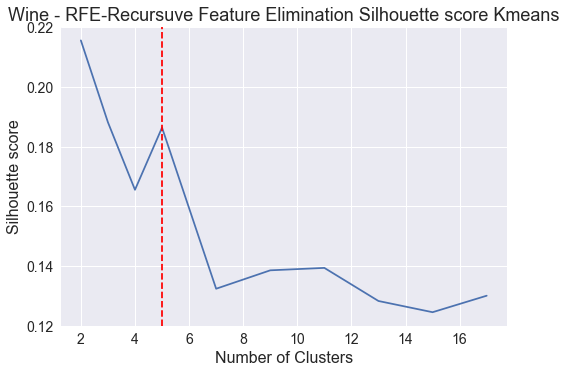

In [6]:
#find best kmeans on pca data using silhouette method
cluster_range = [2,3,4,5,7,9,11,13,15,17]
#mean squared distance between each instance and its closest centroid. Also called inertia
silhouette_list = []
for num_cluster in cluster_range:
    c = KMeans(n_clusters=num_cluster, random_state=10)
    c_labels = c.fit_predict(X_reduced)
    silhouette_list.append(silhouette_score(X_train, c_labels))
plt.style.use('seaborn')
plt.plot([2,3,4,5,7,9,11,13,15,17],silhouette_list)
plt.xlabel('Number of Clusters', fontsize = 16)
plt.ylabel('Silhouette score', fontsize = 16)
plt.title('Wine - RFE-Recursuve Feature Elimination Silhouette score Kmeans', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.axvline(x=5,color='r', linestyle='--')
plt.show()

In [7]:
#use 5 clusters based on above tests
kmeans = KMeans(n_clusters=5, random_state=1)
kmeans_labels = kmeans.fit(X_reduced)

In [8]:
def convert_numarr_to_df_pca (X_train,y_train,features):
    #convert back X_train to df for visulaization
    rows = X_train.shape[0]
    col_list = []
    #target = np.reshape(y_train.to_numpy(),(rows,1))
    target = np.reshape(y_train,(rows,1))
    X_train_vis = np.hstack((X_train,target))
    for i in range(1,features+1):
        col_list.append('component_' + str(i))
    #col_list = list(df.columns)
    col_list.append('quality')
    df_vis = pd.DataFrame(data=X_train_vis,    # values
            #index=data[1:,0],    # 1st column as index
            columns=col_list)
    return df_vis

In [9]:
df_vis_rfe_wine = convert_numarr_to_df_pca(X_reduced,kmeans_labels.labels_,X_reduced.shape[1])

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1279 samples in 0.001s...
[t-SNE] Computed neighbors for 1279 samples in 0.326s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1279
[t-SNE] Computed conditional probabilities for sample 1279 / 1279
[t-SNE] Mean sigma: 0.948886
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.985558
[t-SNE] KL divergence after 300 iterations: 0.940248


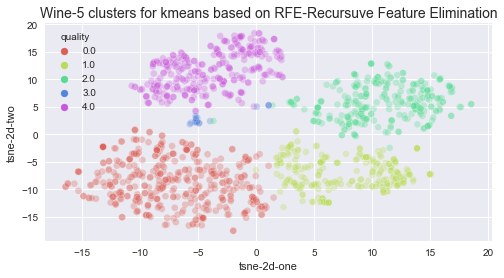

In [10]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300,random_state=42)
tsne_results = tsne.fit_transform(df_vis_rfe_wine)

df_vis_rfe_wine['tsne-2d-one'] = tsne_results[:,0]
df_vis_rfe_wine['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(8,4))
sns.scatterplot(
    x="tsne-2d-one",
    y="tsne-2d-two",
    hue="quality",
    palette=sns.color_palette("hls", 5),
    data=df_vis_rfe_wine,
    legend="full",
    alpha=0.3
)
plt.title('Wine-5 clusters for kmeans based on RFE-Recursuve Feature Elimination', fontsize = 14)
plt.show()

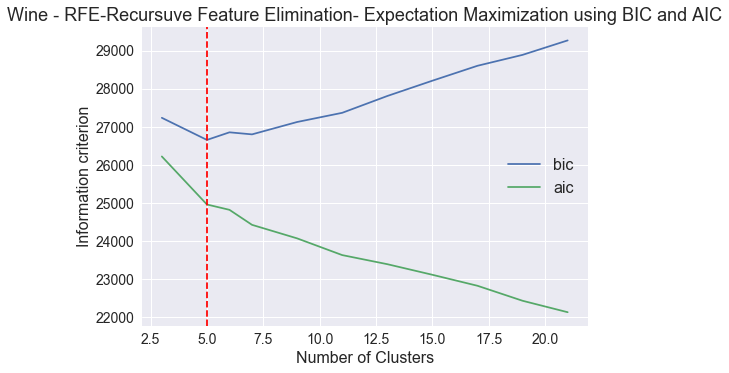

In [11]:
#Refer to last page which explains why AIC and BIC can be different.
#Basically more the number of clusters, more the number of gaussian distributions
#and more the number of parameters. Based on the increased number of parameters,
#bic is penalized which causes bic value to increase.
cluster_range = [3,5,6,7,9,11,13,15,17,19,21]
bic = []
aic = []
for num_cluster in cluster_range:
    gmm = GaussianMixture(covariance_type = 'full', n_components = num_cluster, n_init = 10,random_state=1)
    c_labels = gmm.fit(X_reduced)
    bic.append(gmm.bic(X_reduced))
    aic.append(gmm.aic(X_reduced))
plt.style.use('seaborn')
plt.plot([3,5,6,7,9,11,13,15,17,19,21],bic,label = 'bic')
plt.plot([3,5,6,7,9,11,13,15,17,19,21],aic,label = 'aic')
plt.xlabel('Number of Clusters', fontsize = 16)
plt.ylabel('Information criterion', fontsize = 16)
plt.legend(fontsize=16)
plt.title('Wine - RFE-Recursuve Feature Elimination- Expectation Maximization using BIC and AIC', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.axvline(x=5,color='r', linestyle='--')
#plt.ylim(20000,35000)
plt.show()

In [12]:
gmm = GaussianMixture(covariance_type = 'full', n_components = 5, n_init = 10,random_state=1)
gmm_c_labels = gmm.fit(X_reduced)

In [13]:
df_vis_gmm_rfe_wine = convert_numarr_to_df_pca(X_reduced,gmm_c_labels.predict(X_reduced),X_reduced.shape[1])

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1279 samples in 0.001s...
[t-SNE] Computed neighbors for 1279 samples in 0.098s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1279
[t-SNE] Computed conditional probabilities for sample 1279 / 1279
[t-SNE] Mean sigma: 0.993141
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.390846
[t-SNE] KL divergence after 300 iterations: 0.956790


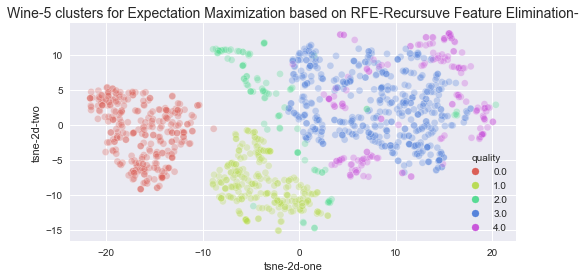

In [14]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300,random_state=42)
tsne_results = tsne.fit_transform(df_vis_gmm_rfe_wine)

df_vis_gmm_rfe_wine['tsne-2d-one'] = tsne_results[:,0]
df_vis_gmm_rfe_wine['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(8,4))
sns.scatterplot(
    x="tsne-2d-one",
    y="tsne-2d-two",
    hue="quality",
    palette=sns.color_palette("hls", 5),
    data=df_vis_gmm_rfe_wine,
    legend="full",
    alpha=0.3
)
plt.title('Wine-5 clusters for Expectation Maximization based on RFE-Recursuve Feature Elimination-', fontsize = 14)
plt.show()

In [15]:
#load data
df = pd.read_csv (r'./data/diabetes.csv')

#preprocessing
# convert target to binary
df.loc[df["class"] =='tested_negative', "class"] = 0
df.loc[df["class"] == 'tested_positive', "class"] = 1

#get the target
y = df.pop('class')
#scale features
X_scaled = preprocessing.scale(df)

#oversample = BorderlineSMOTE(random_state=42)
#X_scaled, y = oversample.fit_resample(X_scaled, y)


#split train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)


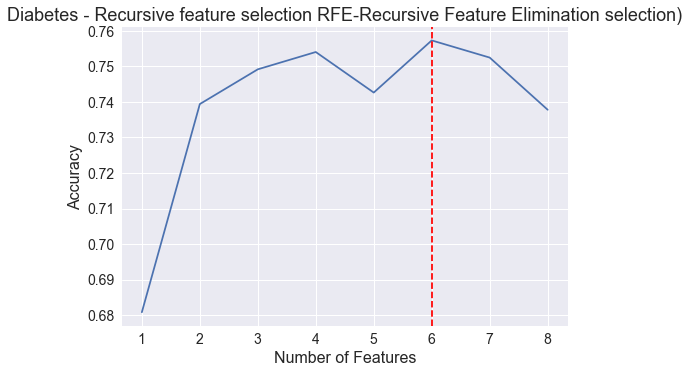

In [16]:
#recursive feature selection RFE
#dim reduction using labels
n_features = X_train.shape[1]
y_train=y_train.astype('int')
accuracy_list = []
kfold = StratifiedKFold(n_splits=3, random_state=42,shuffle = True)
for feature in range(1,n_features+1):
    selector = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=feature)
    selector = selector.fit(X_train, y_train)
    X_reduced = X_train[:,selector.support_]
    rf = RandomForestClassifier(random_state=42)
    mean_accuracy = np.mean(cross_val_score(rf, X_reduced, y_train, scoring='accuracy', cv=5, n_jobs=-1, error_score='raise'))
    accuracy_list.append(mean_accuracy)
plt.style.use('seaborn')
plt.plot(range(1,n_features+1),accuracy_list)
plt.xlabel('Number of Features', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)
#plt.legend(fontsize=16)
plt.title('Diabetes - Recursive feature selection RFE-Recursive Feature Elimination selection)', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
#plt.ylim(0.75,0.81)
plt.axvline(x=6,color='r', linestyle='--')
plt.show()

In [17]:
#use 6 components based on above tests
selector = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=6)
selector = selector.fit(X_train, y_train)
X_reduced = X_train[:,selector.support_]

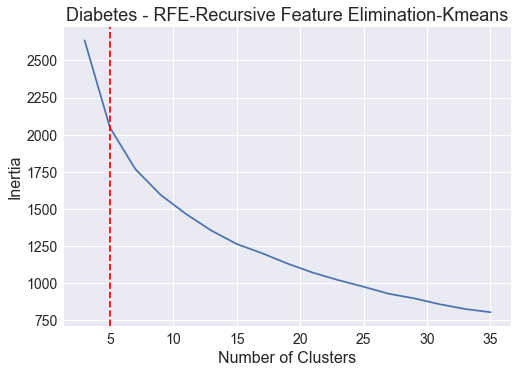

In [18]:
#find best kmeans on pca data using elbow method
cluster_range = [3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35]
#mean squared distance between each instance and its closest centroid. Also called inertia
msd = []
for num_cluster in cluster_range:
    c = KMeans(n_clusters=num_cluster, random_state=42)
    #apply kmeans on pca data
    c_labels = c.fit(X_reduced)
    msd.append(c.inertia_)
plt.style.use('seaborn')
plt.plot([3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35],msd)
plt.xlabel('Number of Clusters', fontsize = 16)
plt.ylabel('Inertia', fontsize = 16)
plt.title('Diabetes - RFE-Recursive Feature Elimination-Kmeans', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.axvline(x=5,color='r', linestyle='--')
plt.show()

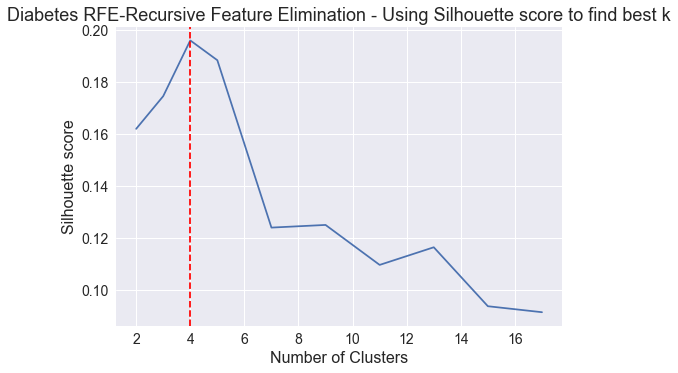

In [19]:
#find best kmeans on pca data using silhouette method
cluster_range = [2,3,4,5,7,9,11,13,15,17]
#mean squared distance between each instance and its closest centroid. Also called inertia
silhouette_list = []
for num_cluster in cluster_range:
    c = KMeans(n_clusters=num_cluster, random_state=42)
    c_labels = c.fit_predict(X_reduced)
    silhouette_list.append(silhouette_score(X_train, c_labels))
plt.style.use('seaborn')
plt.plot([2,3,4,5,7,9,11,13,15,17],silhouette_list)
plt.xlabel('Number of Clusters', fontsize = 16)
plt.ylabel('Silhouette score', fontsize = 16)
plt.title('Diabetes RFE-Recursive Feature Elimination - Using Silhouette score to find best k', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.axvline(x=4,color='r', linestyle='--')
plt.show()

In [20]:
kmeans = KMeans(n_clusters=5, random_state=1)
kmeans_labels = kmeans.fit(X_reduced)

In [21]:
def convert_numarr_to_df_pca (X_train,y_train,features):
    #convert back X_train to df for visulaization
    rows = X_train.shape[0]
    col_list = []
    #target = np.reshape(y_train.to_numpy(),(rows,1))
    target = np.reshape(y_train,(rows,1))
    X_train_vis = np.hstack((X_train,target))
    for i in range(1,features+1):
        col_list.append('component_' + str(i))
    #col_list = list(df.columns)
    col_list.append('class')
    df_vis = pd.DataFrame(data=X_train_vis,    # values
            #index=data[1:,0],    # 1st column as index
            columns=col_list)
    return df_vis

In [22]:
df_vis_rfe_diabetes = convert_numarr_to_df_pca(X_reduced,kmeans_labels.labels_,X_reduced.shape[1])

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 614 samples in 0.001s...
[t-SNE] Computed neighbors for 614 samples in 0.028s...
[t-SNE] Computed conditional probabilities for sample 614 / 614
[t-SNE] Mean sigma: 0.813712
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.264194
[t-SNE] KL divergence after 300 iterations: 0.674337


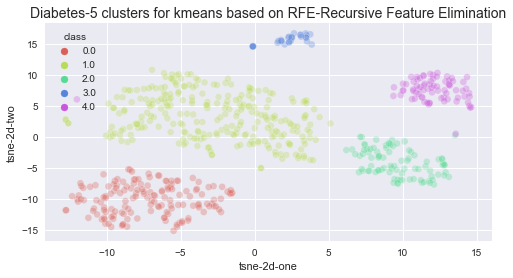

In [23]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300,random_state=42)
tsne_results = tsne.fit_transform(df_vis_rfe_diabetes)

df_vis_rfe_diabetes['tsne-2d-one'] = tsne_results[:,0]
df_vis_rfe_diabetes['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(8,4))
sns.scatterplot(
    x="tsne-2d-one",
    y="tsne-2d-two",
    hue="class",
    palette=sns.color_palette("hls", 5),
    data=df_vis_rfe_diabetes,
    legend="full",
    alpha=0.3
)
plt.title('Diabetes-5 clusters for kmeans based on RFE-Recursive Feature Elimination', fontsize = 14)
plt.show()

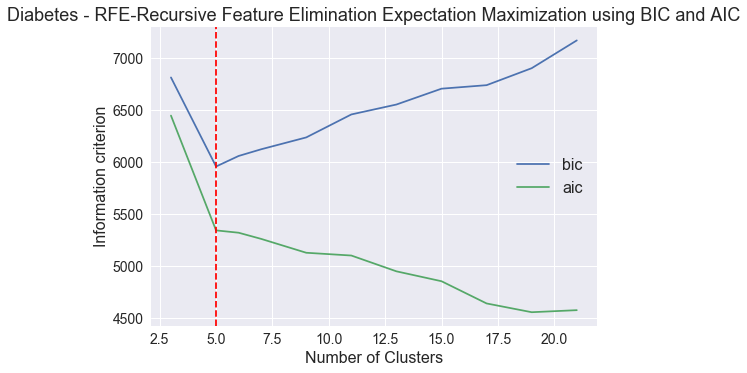

In [24]:
#Refer to last page which explains why AIC and BIC can be different.
#Basically more the number of clusters, more the number of gaussian distributions
#and more the number of parameters. Based on the increased number of parameters,
#bic is penalized which causes bic value to increase.
cluster_range = [3,5,6,7,9,11,13,15,17,19,21]
bic = []
aic = []
for num_cluster in cluster_range:
    gmm = GaussianMixture(covariance_type = 'full', n_components = num_cluster, n_init = 10,random_state=1)
    c_labels = gmm.fit(X_reduced)
    bic.append(gmm.bic(X_reduced))
    aic.append(gmm.aic(X_reduced))
plt.style.use('seaborn')
plt.plot([3,5,6,7,9,11,13,15,17,19,21],bic,label = 'bic')
plt.plot([3,5,6,7,9,11,13,15,17,19,21],aic,label = 'aic')
plt.xlabel('Number of Clusters', fontsize = 16)
plt.ylabel('Information criterion', fontsize = 16)
plt.legend(fontsize=16)
plt.title('Diabetes - RFE-Recursive Feature Elimination Expectation Maximization using BIC and AIC', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.axvline(x=5,color='r', linestyle='--')
#plt.ylim(20000,35000)
plt.show()

In [25]:
gmm = GaussianMixture(covariance_type = 'full', n_components = 5, n_init = 10,random_state=1)
gmm_c_labels = gmm.fit(X_reduced)

In [26]:
df_vis_gmm_rfe_diabetes = convert_numarr_to_df_pca(X_reduced,gmm_c_labels.predict(X_reduced),X_reduced.shape[1])

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 614 samples in 0.001s...
[t-SNE] Computed neighbors for 614 samples in 0.026s...
[t-SNE] Computed conditional probabilities for sample 614 / 614
[t-SNE] Mean sigma: 0.877303
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.229206
[t-SNE] KL divergence after 300 iterations: 0.679422


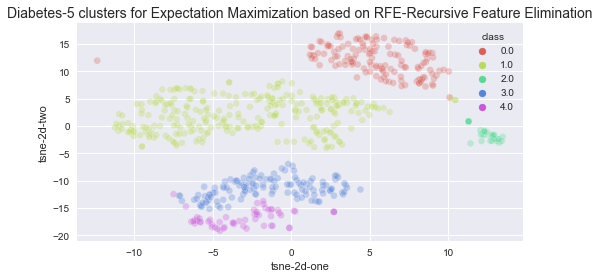

In [27]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300,random_state=42)
tsne_results = tsne.fit_transform(df_vis_gmm_rfe_diabetes)

df_vis_gmm_rfe_diabetes['tsne-2d-one'] = tsne_results[:,0]
df_vis_gmm_rfe_diabetes['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(8,4))
sns.scatterplot(
    x="tsne-2d-one",
    y="tsne-2d-two",
    hue="class",
    palette=sns.color_palette("hls", 5),
    data=df_vis_gmm_rfe_diabetes,
    legend="full",
    alpha=0.3
)
plt.title('Diabetes-5 clusters for Expectation Maximization based on RFE-Recursive Feature Elimination', fontsize = 14)
plt.show()